In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
# Load in csv
ep_df = pd.read_csv("C:/Users/mford.MSBIOWORKS/Project_1/MER_T01_02.csv")
# print(monthly_energy_production_df)
ep_df.head(5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [4]:
# Convert date to string
ep_df["YYYYMM"] = ep_df["YYYYMM"].astype(str)
ep_df.head(5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [5]:
data_types = ep_df.dtypes
print(data_types)

MSN             object
YYYYMM          object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object


In [6]:
# filter to contain only MM = 13 values
annual_sum_ep_df = ep_df[ep_df['YYYYMM'].str[-2:] == "13"]
annual_sum_ep_df.head(5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [7]:
#Reformat date

# Create a copy of the original DataFrame
filtered_annual_ep_df = annual_sum_ep_df.copy()

# Reformat date
filtered_annual_ep_df['Year'] = annual_sum_ep_df['YYYYMM'].str[:4]

# Drop the 'YYYYMM' column
filtered_annual_ep_df = filtered_annual_ep_df.drop(columns=['YYYYMM'])

# Display the modified DataFrame
filtered_annual_ep_df.head()









,MSN,Value,Column_Order,Description,Unit,Year
0,CLPRBUS,11.973882,1,Coal Production,Quadrillion Btu,1949
1,CLPRBUS,14.060135,1,Coal Production,Quadrillion Btu,1950
2,CLPRBUS,14.419325,1,Coal Production,Quadrillion Btu,1951
3,CLPRBUS,12.734313,1,Coal Production,Quadrillion Btu,1952
4,CLPRBUS,12.277746,1,Coal Production,Quadrillion Btu,1953


In [8]:
#View entries in Description
unique_descriptions = filtered_annual_ep_df["Description"].unique()
print(unique_descriptions)


['Coal Production' 'Natural Gas (Dry) Production' 'Crude Oil Production'
 'Natural Gas Plant Liquids Production' 'Total Fossil Fuels Production'
 'Nuclear Electric Power Production' 'Hydroelectric Power Production'
 'Geothermal Energy Production' 'Solar Energy Production'
 'Wind Energy Production' 'Biomass Energy Production'
 'Total Renewable Energy Production' 'Total Primary Energy Production']


In [9]:
# Assuming 'your_column' is the name of the column you want to convert to numeric
filtered_annual_ep_df['Value'] = pd.to_numeric(filtered_annual_ep_df['Value'], errors='coerce')

In [10]:
transposed_df = filtered_annual_ep_df.pivot(index='Description', columns='Year', values='Value')
transposed_df = transposed_df.reset_index()
transposed_df.columns.name = None


In [14]:
transposed_df.head(20)

,Description,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Biomass Energy Production,1.549262,1.562307,1.534669,1.474369,1.418601,1.394327,1.424143,1.415871,1.333581,...,4.834795,5.052100,5.031349,5.131757,5.165713,5.314147,5.215002,4.709773,4.913616,5.073211
1,Coal Production,11.973882,14.060135,14.419325,12.734313,12.277746,10.542448,12.369608,13.306334,13.061393,...,20.001304,20.285705,17.946095,14.667089,15.625377,15.363442,14.255763,10.703214,11.596284,12.043193
2,Crude Oil Production,10.683252,11.446729,13.036724,13.281049,13.671076,13.426930,14.409682,15.180241,15.178026,...,15.867760,18.610131,19.697310,18.526662,19.546610,22.807907,25.604215,23.574988,23.401382,24.710492
3,Geothermal Energy Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.117323,0.117672,0.117811,0.117498,0.117842,0.117980,0.116293,0.117716,0.118007,0.118389
4,Hydroelectric Power Production,0.323365,0.344218,0.356131,0.374325,0.374015,0.380915,0.396597,0.427307,0.455017,...,0.916345,0.884959,0.849861,0.913775,1.024736,0.998092,0.982225,0.973355,0.858407,0.869339
5,Natural Gas (Dry) Production,5.377243,6.232975,7.415733,7.963599,8.338838,8.681785,9.344668,10.002147,10.605254,...,24.859072,26.718073,28.066882,27.576023,28.289335,31.882148,35.187183,35.062141,35.806859,37.661732
6,Natural Gas Plant Liquids Production,0.706102,0.813366,0.910336,0.985701,1.050702,1.101065,1.222838,1.264288,1.273767,...,3.451386,4.005085,4.475993,4.664785,4.987096,5.726973,6.351729,6.804761,7.098605,7.741902
7,Nuclear Electric Power Production,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000112,...,8.244433,8.337559,8.336886,8.426753,8.418968,8.438068,8.451852,8.251075,8.130913,8.061020
8,Solar Energy Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.119650,0.161050,0.196175,0.250888,0.328623,0.383634,0.429747,0.511315,0.626863,0.764580
9,Total Fossil Fuels Production,28.740479,32.553205,35.782118,34.964662,35.338361,33.752228,37.346797,39.753010,40.118440,...,64.179522,69.618994,70.186279,65.434559,68.448418,75.780470,81.398890,76.145104,77.903130,82.157318


In [13]:
data_types = transposed_df.dtypes
print(data_types)

Description     object
1949           float64
1950           float64
1951           float64
1952           float64
                ...   
2018           float64
2019           float64
2020           float64
2021           float64
2022           float64
Length: 75, dtype: object


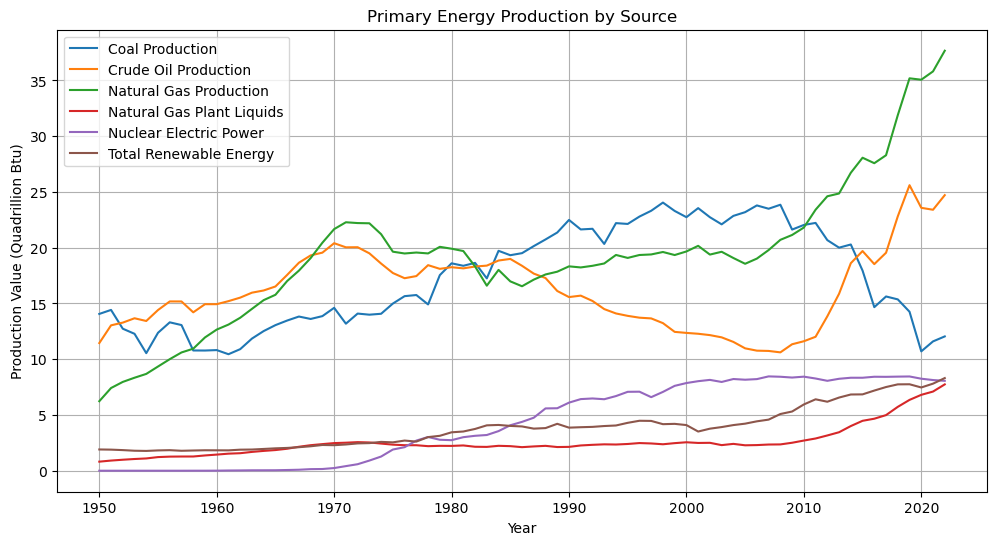

In [16]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
coal_production_row = transposed_df[(transposed_df.index == 1) & (transposed_df['Description'] == 'Coal Production')]
crude_oil_production_row = transposed_df[(transposed_df.index == 2) & (transposed_df['Description'] == 'Crude Oil Production')]
natural_gas_production_row = transposed_df[(transposed_df.index == 5) & (transposed_df['Description'] == 'Natural Gas (Dry) Production')]
natural_gas_liquids_row = transposed_df[(transposed_df.index == 6) & (transposed_df['Description'] == 'Natural Gas Plant Liquids Production')]
nuclear_power_row = transposed_df[(transposed_df.index == 7) & (transposed_df['Description'] == 'Nuclear Electric Power Production')]
renewable_energy_row = transposed_df[(transposed_df.index == 11) & (transposed_df['Description'] == 'Total Renewable Energy Production')]

# Extract the years and values for each production type
years = coal_production_row.columns[2:].astype(int)
coal_values = coal_production_row.values[:, 2:].flatten().astype(float)
crude_oil_values = crude_oil_production_row.values[:, 2:].flatten().astype(float)
natural_gas_values = natural_gas_production_row.values[:, 2:].flatten().astype(float)
natural_gas_liquids_values = natural_gas_liquids_row.values[:, 2:].flatten().astype(float)
nuclear_power_values = nuclear_power_row.values[:, 2:].flatten().astype(float)
renewable_energy_values = renewable_energy_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, coal_values, linestyle='-', label='Coal Production')
plt.plot(years, crude_oil_values, linestyle='-', label='Crude Oil Production')
plt.plot(years, natural_gas_values, linestyle='-', label='Natural Gas Production')
plt.plot(years, natural_gas_liquids_values, linestyle='-', label='Natural Gas Plant Liquids')
plt.plot(years, nuclear_power_values, linestyle='-', label='Nuclear Electric Power')
plt.plot(years, renewable_energy_values, linestyle='-', label='Total Renewable Energy')
plt.title("Primary Energy Production by Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()
plt.show()


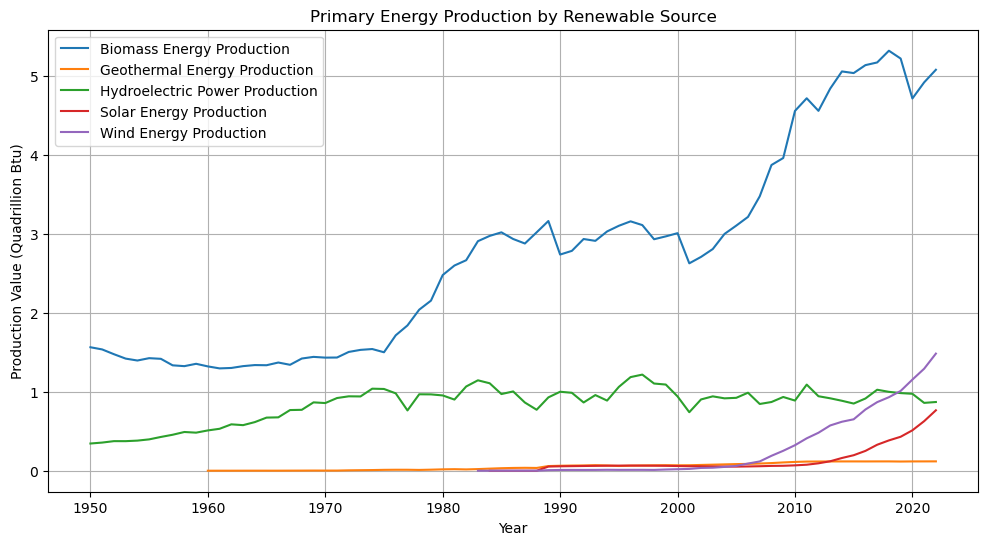

In [18]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
Biomass_Energy_Production_row = transposed_df[(transposed_df.index == 0) & (transposed_df['Description'] == 'Biomass Energy Production')]
Geothermal_Energy_Production_row = transposed_df[(transposed_df.index == 3) & (transposed_df['Description'] == 'Geothermal Energy Production')]
Hydroelectric_Power_Production_row = transposed_df[(transposed_df.index == 4) & (transposed_df['Description'] == 'Hydroelectric Power Production')]
Solar_Energy_Production_row = transposed_df[(transposed_df.index == 8) & (transposed_df['Description'] == 'Solar Energy Production')]
Wind_Energy_Production_row = transposed_df[(transposed_df.index == 12) & (transposed_df['Description'] == 'Wind Energy Production')]


# Extract the years and values for each production type
years = Biomass_Energy_Production_row.columns[2:].astype(int)
Biomass_values = Biomass_Energy_Production_row.values[:, 2:].flatten().astype(float)
Geothermal_values = Geothermal_Energy_Production_row.values[:, 2:].flatten().astype(float)
Hydroelectric_values = Hydroelectric_Power_Production_row.values[:, 2:].flatten().astype(float)
Solar_values = Solar_Energy_Production_row.values[:, 2:].flatten().astype(float)
Wind_values = Wind_Energy_Production_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, Biomass_values, linestyle='-', label='Biomass Energy Production')
plt.plot(years, Geothermal_values, linestyle='-', label='Geothermal Energy Production')
plt.plot(years, Hydroelectric_values, linestyle='-', label='Hydroelectric Power Production')
plt.plot(years, Solar_values, linestyle='-', label='Solar Energy Production')
plt.plot(years, Wind_values, linestyle='-', label='Wind Energy Production')
plt.title("Primary Energy Production by Renewable Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()
plt.show()

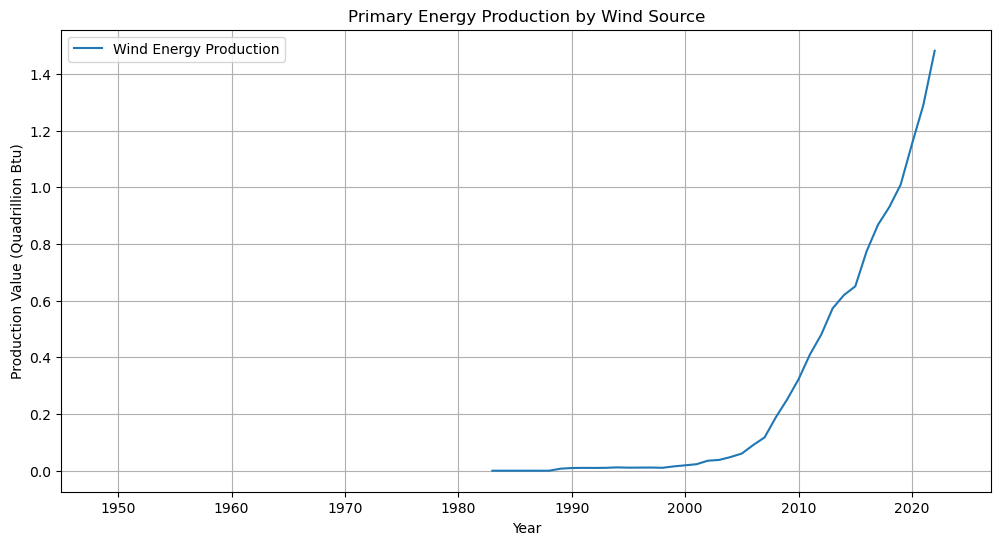

In [23]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
Wind_Energy_Production_row = transposed_df[(transposed_df.index == 12) & (transposed_df['Description'] == 'Wind Energy Production')]


# Extract the years and values for each production type
years = Biomass_Energy_Production_row.columns[2:].astype(int)
Wind_values = Wind_Energy_Production_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, Wind_values, linestyle='-', label='Wind Energy Production')
plt.title("Primary Energy Production by Wind Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()

# Extend the x-axis by adding extra space on both ends
plt.xlim(years[0] - 5, years[-1] + 5)  # Adjust the numbers to control the extension

plt.show()

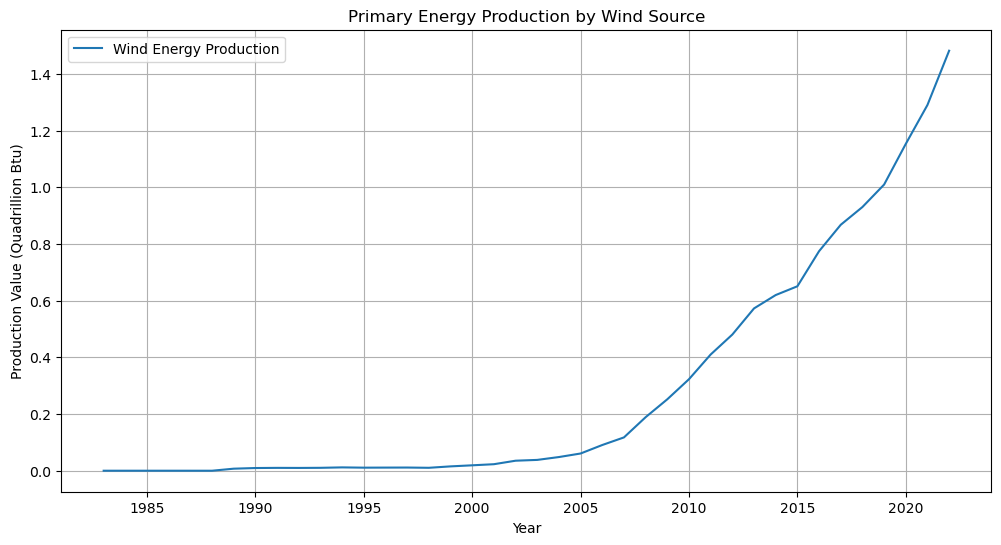

In [24]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
Wind_Energy_Production_row = transposed_df[(transposed_df.index == 12) & (transposed_df['Description'] == 'Wind Energy Production')]


# Extract the years and values for each production type
years = Biomass_Energy_Production_row.columns[2:].astype(int)
Wind_values = Wind_Energy_Production_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, Wind_values, linestyle='-', label='Wind Energy Production')
plt.title("Primary Energy Production by Wind Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Needs percentage growth calculating